# Author : S ADITYA
# SRM UNIVERSITY

## Task 6 : Prediction using Decision Tree Algorithm(Intermediate)
## GRIP @ The Sparks Foundation

Decision Trees are versatile Machine Learning algorithms that can perform
both classification and regression tasks, and even multioutput tasks.For the given ‘Iris’ dataset, I created the Decision Tree classifier and visualized it
graphically. The purpose of this task is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.
&nbsp;



## Technogy Used  : Scikit Learn, Numpy Array, Seaborn, Pandas, Matplotlib, Pydot


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from numpy import asarray
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [2]:
# Read given data-set using pandas

text_data = pd.read_csv("Iris.csv",encoding= 'unicode_escape')
print("Shape of text_data : ", text_data.shape)
text_data.head(3)

Shape of text_data :  (150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [3]:
text_data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
text_data.isnull().sum() # Checking if any feature have null Valuess or not

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
text_data.drop('Id', axis=1,inplace = True)#dropping id which not use full feature 

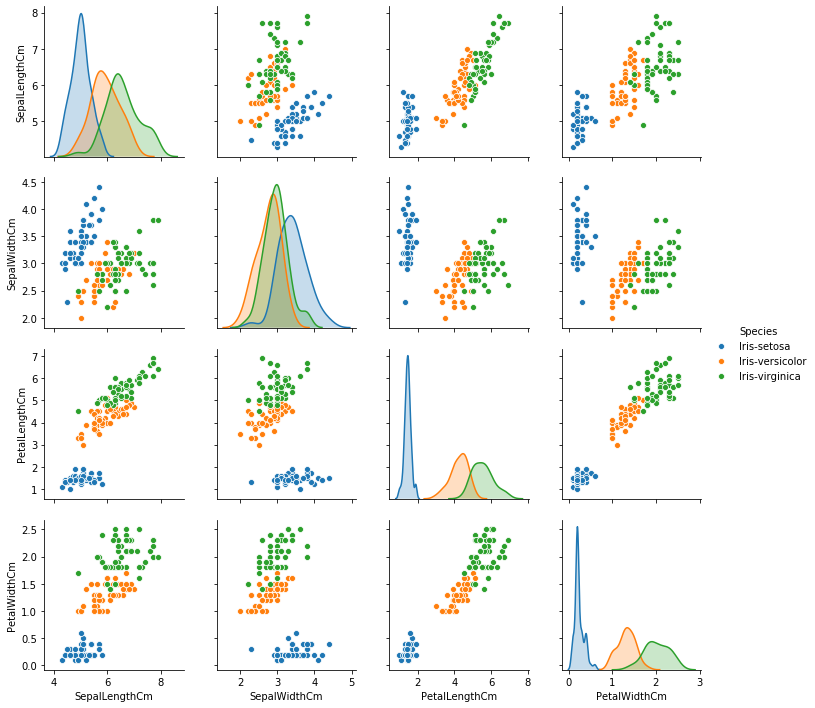

In [7]:
sns.pairplot(text_data,hue='Species')# Data visualizing through sea born

In [27]:
X = text_data.drop(columns = ['Species'])
y = text_data['Species']


In [9]:
X = np.array(X)
y = np.array(y)

In [10]:
print(X.shape)
print(y.shape) 

(150, 4)
(150,)


In [11]:
y = y.reshape(-1,1) # we are reshape the y axis to get dimensionality equality .
y.shape

(150, 1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)
print(X_train.shape); print(X_test.shape) #we are splinting our dataset into two part train and test dataset

(120, 4)
(30, 4)


In [13]:
#Create a Decision Tree Classifier
clf=DecisionTreeClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [14]:
accuracy_DecisionTreeClassifier = clf.score(X_test,y_test)
accuracy_DecisionTreeClassifier

1.0

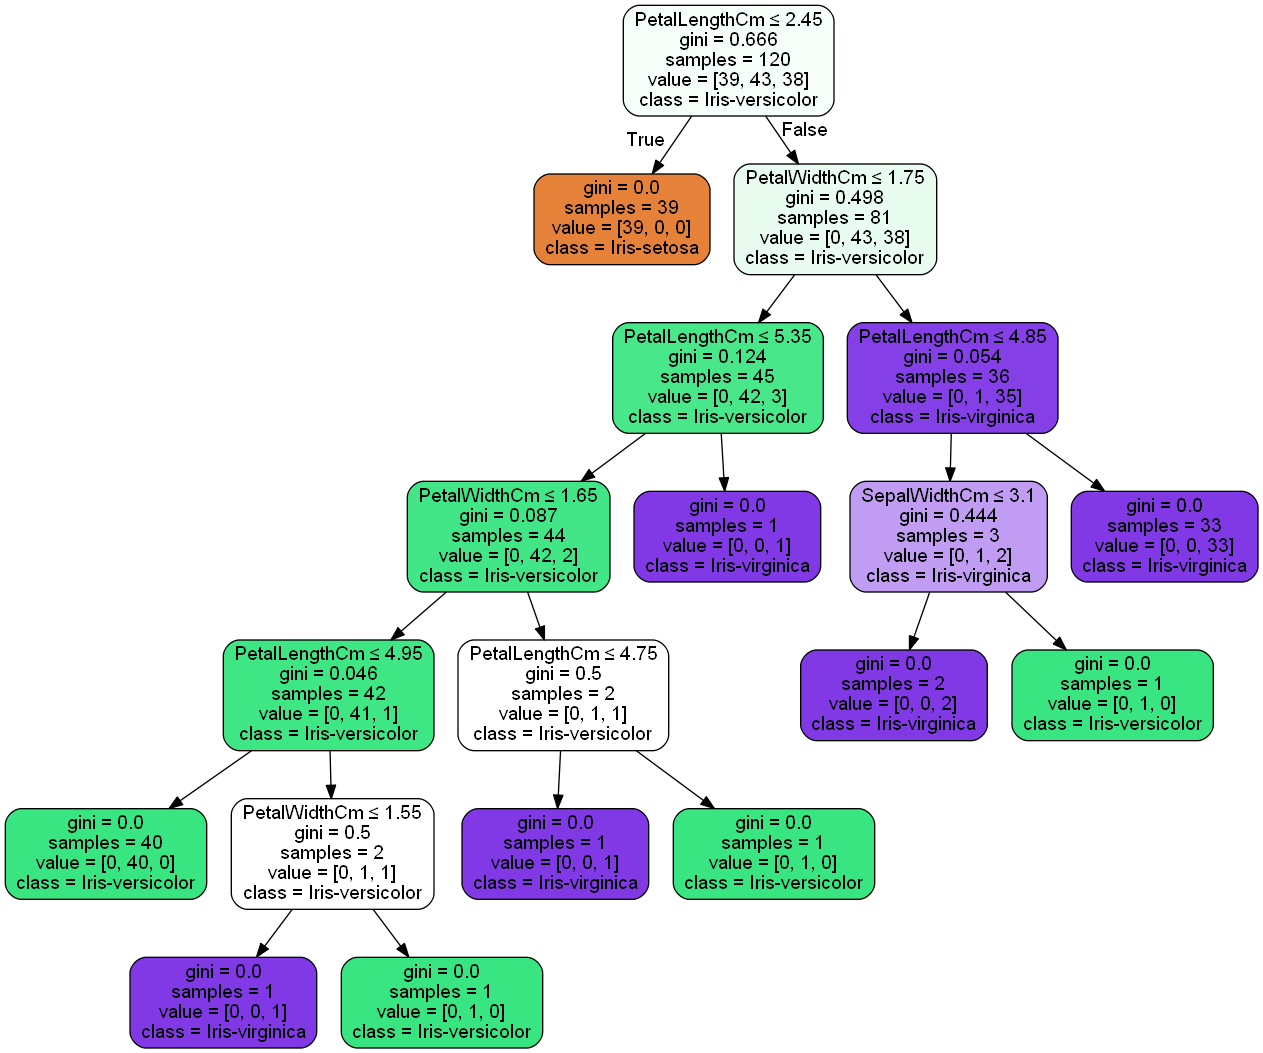

In [16]:
feature_cols =[ 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'] # Tree Representation 
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Iris.png')
Image(graph.create_png())

In [30]:
#feature_cols =[ 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
'''NEW DATA IS INSERTED TO OUR MODEL'''
feature=[['4.9','3.0','1.4','0.2']]
print(clf.predict(feature)) 

['Iris-setosa']
